In [1]:
from SonicBatt import utils
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

root_dir = utils.root_dir()
study_path = os.path.join(root_dir, 'studies', 'degradation')
data_path = os.path.join(study_path, 'Raw Data')
visualistion_path = os.path.join(study_path, 'Visualisation')

database = pd.read_excel(os.path.join(data_path, 'database.xlsx'))
test_id = database.loc[database['test_type']=='gel_stability']
test_id = test_id['test_id'].iloc[0]
test_dir = os.path.join(data_path, test_id)


In [2]:
# Identify Acoustic Peaks
df = utils.df_with_peaks(data_path, test_id, passes=50
                         )
time = df['cycling'].loc[:, 'Time(s)'].to_numpy()/3600/24
V = df['cycling'].loc[:, 'V(V)'].to_numpy()


Smoothing signals. Passes = 50. Window_len = 15
-----------------
0.00 %
10.00 %
20.00 %
30.00 %
40.00 %
50.00 %
60.00 %
70.00 %
80.00 %
90.00 %


Text(0.5, 0.98, 'Peak variation due to gel ageing\nTemperature: 24.1-24.6$^\\circ$C')

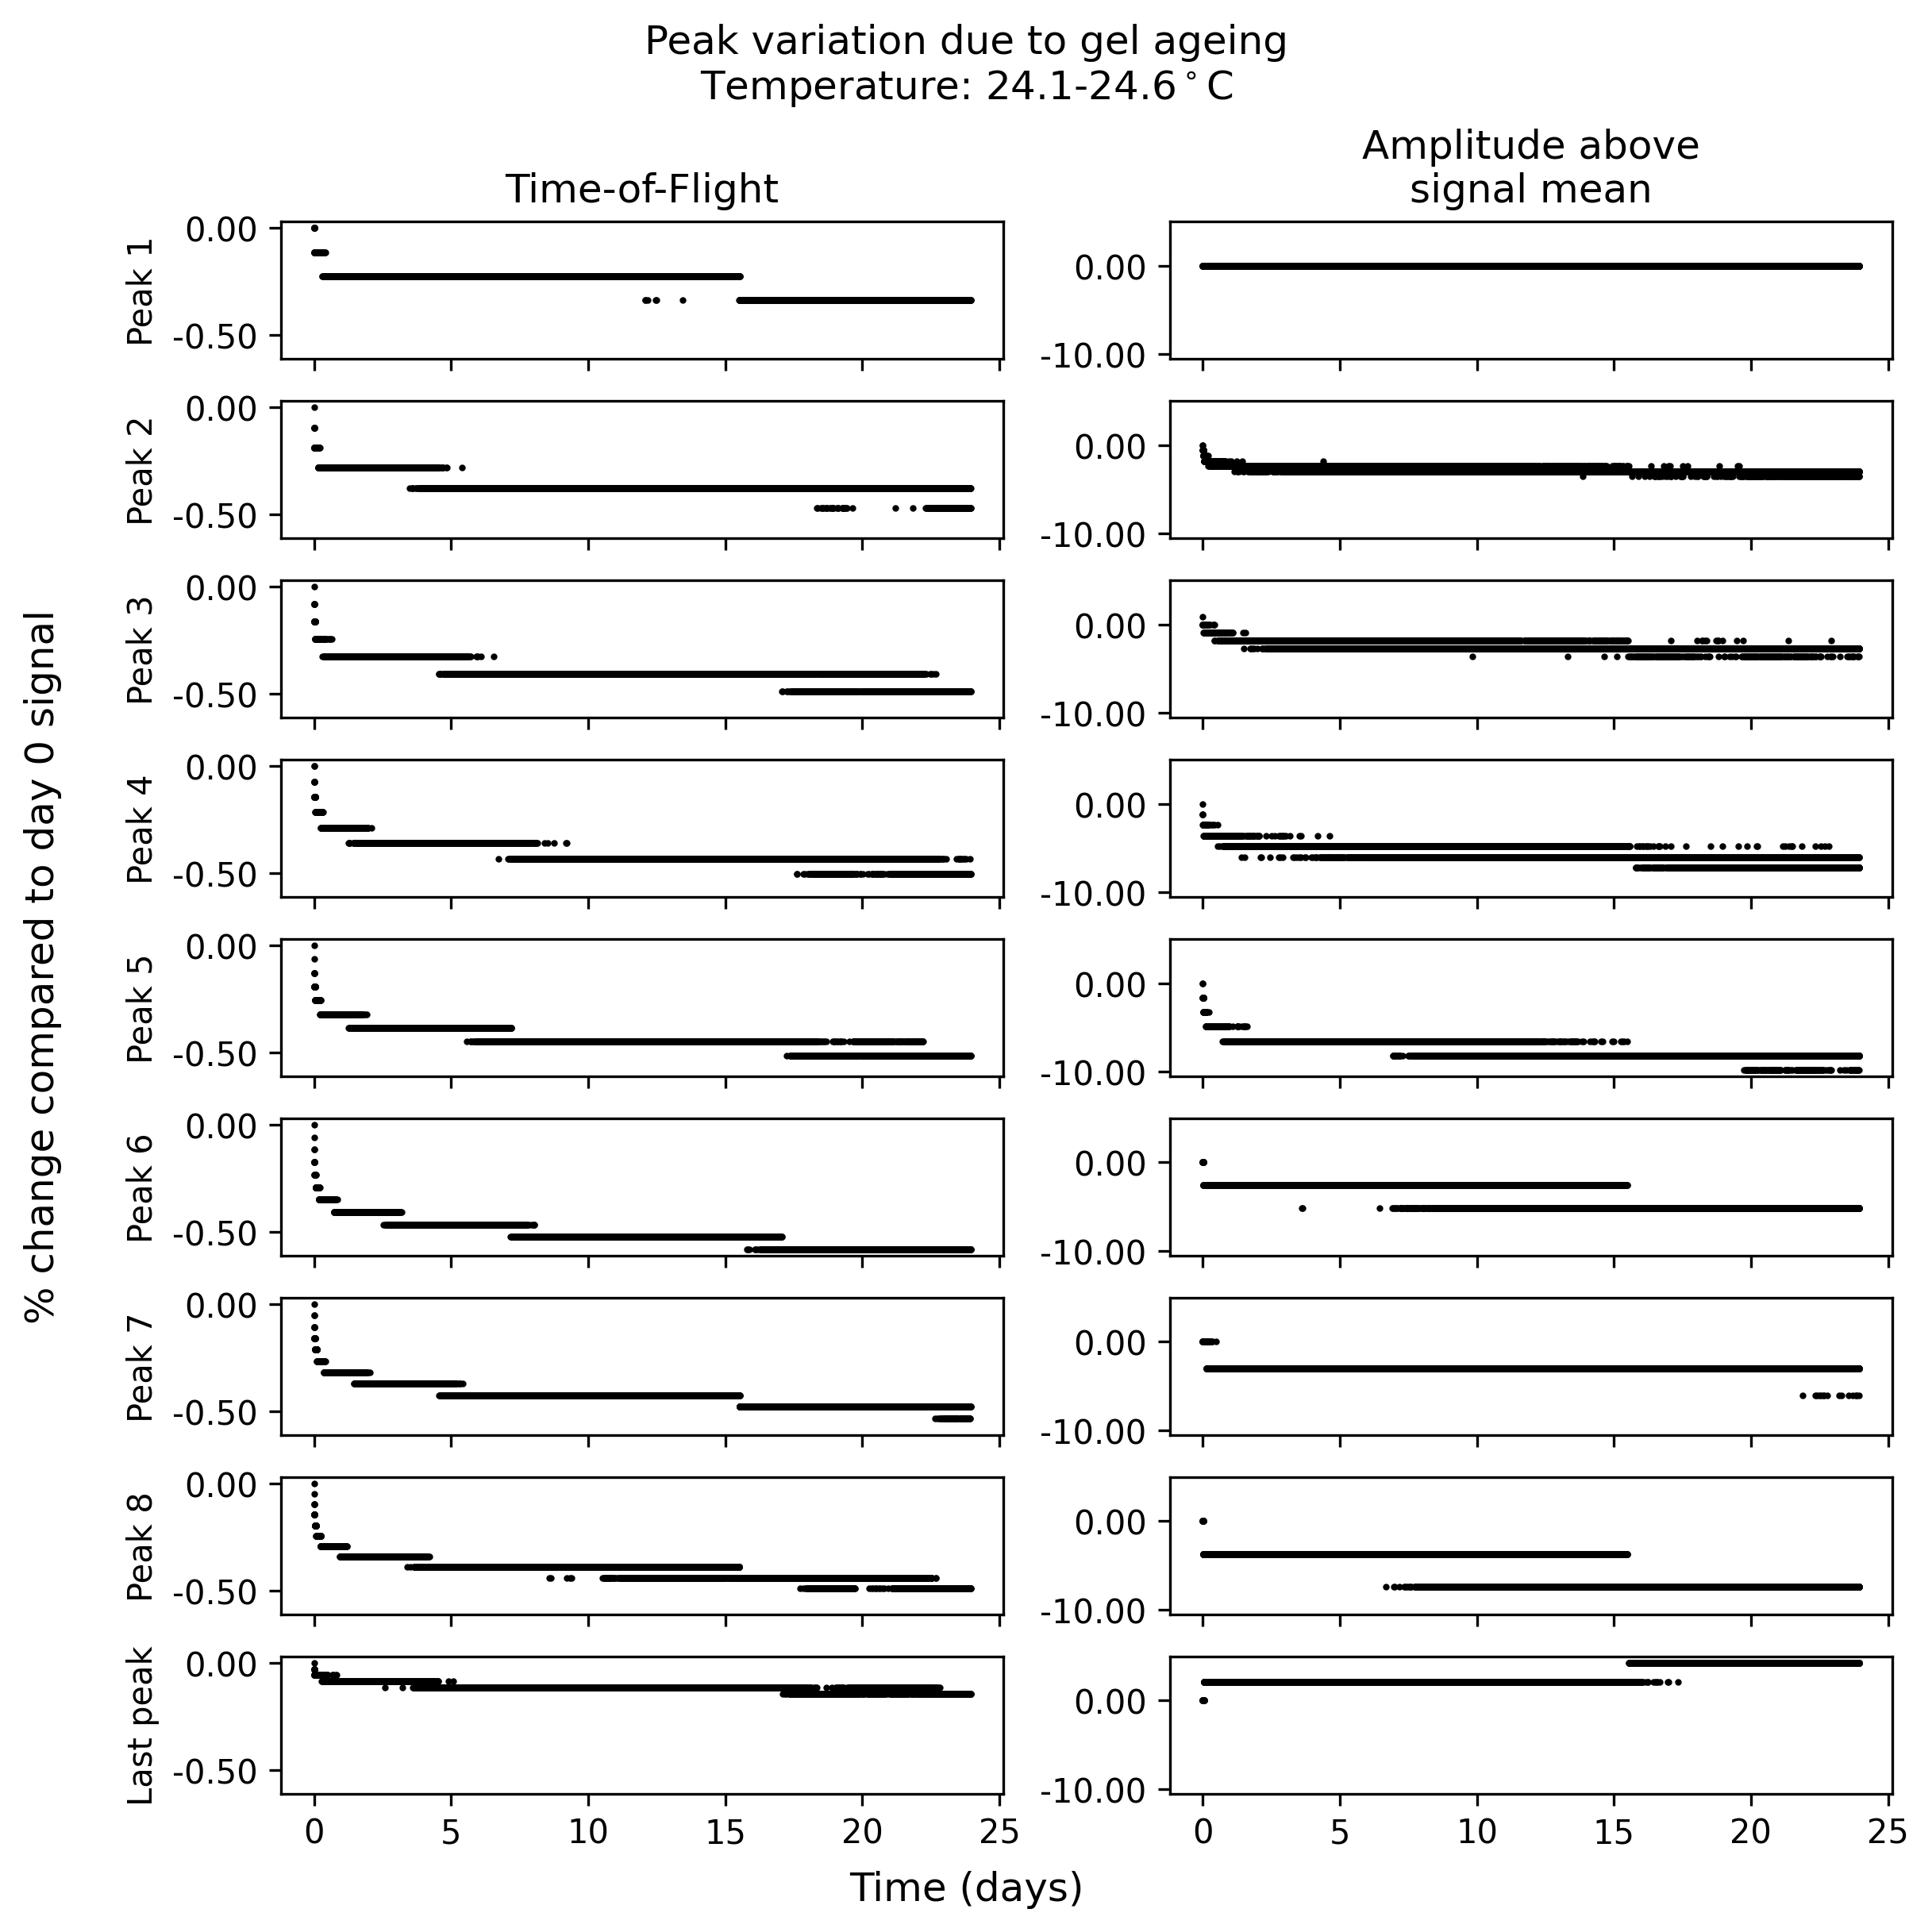

In [3]:
# Plot peaks
scatter_s = 1
peaks_dict = {0: 'Peak 1', 1: 'Peak 2', 2: 'Peak 3', 3: 'Peak 4', 4: 'Peak 5', 5: 'Peak 6',
              6: 'Peak 7', 7: 'Peak 8', 8: 'Last peak'
              }

mean_ampl = df['acoustics'].iloc[0][0]
f, axs = plt.subplots(9, 2, constrained_layout=True, figsize = (8,8), dpi=300,
                      sharex=True, sharey='col')
for peak_ind in range(9):
    # ToF
    y_values =  ((df[('peak_tofs', str(peak_ind))] - df[('peak_tofs', str(peak_ind))].iloc[0])/
        (df[('peak_tofs', str(peak_ind))].iloc[0]) * 100)
    # y_values =  ((df[('peak_tofs', str(peak_ind))] - df[('peak_tofs', str(peak_ind))].iloc[0]))

    axs[peak_ind, 0].scatter(time, y_values, color='k', s=scatter_s)
    axs[peak_ind, 0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    axs[peak_ind, 0].set_ylabel(peaks_dict[peak_ind])
    # Amplitude
    # The normalisation is with reference to the initial value - the mean_ampl.
    y_values =  ((df[('peak_heights', str(peak_ind))] - df[('peak_heights', str(peak_ind))].iloc[0])/
        (df[('peak_heights', str(peak_ind))].iloc[0] - mean_ampl) * 100)
    axs[peak_ind, 1].scatter(time, y_values, color='k', s=scatter_s)
    axs[peak_ind, 1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
axs[0,0].set_title('Time-of-Flight')
axs[0,1].set_title('Amplitude above\nsignal mean')
f.supxlabel('Time (days)')
f.supylabel('% change compared to day 0 signal\n')
f.suptitle('Peak variation due to gel ageing\nTemperature: 24.1-24.6$^\circ$C')
